In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
sns.set_theme()

In [3]:
df = pd.read_csv("Library_Usage_Clean.csv", low_memory=False, na_values='Null')

In [5]:
df.columns

Index(['Unnamed: 0', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Definition',
       'Circulation Active Month', 'Circulation Active Year',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Within San Francisco County',
       'Membership Duration'],
      dtype='object')

# 1. Lohnt sich der Versand per Post?

Anteil 5318 NutzerInnen = 1,29% (s. value_counts)

### 1.1 Wer lässt sich per Post benachrichtigen?

Von allen Post-Benachrichtigungen geht der größte Anteil (> 30%) an 25-44 jährige (s. crosstab 0)

unter diesen Nutzergruppen (die größten von allen, zusammen ca. 40% (s. value_counts)) ist der Postanteil dagegen sehr gering: ca. 1% (s. crosstab 1)

deswegen freundlicher Aufruf an unsere Nutzerinnen zwischen 25 und 44, zu prüfen, ob sie auf elektronische Benachrichtigung umstellen kann (Bibliothek muss sparen)

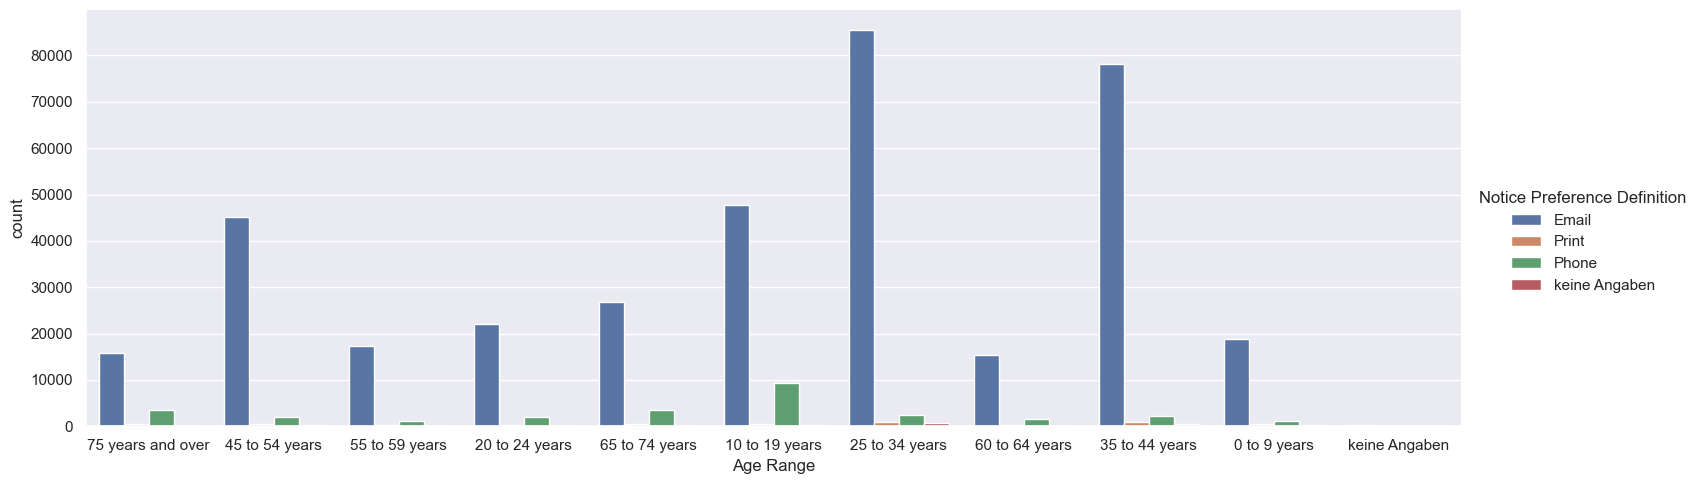

In [18]:
plot_notice = sns.catplot(x='Age Range', hue='Notice Preference Definition', data=df, kind='count', aspect=3)
plt.show(plot_notice)

### 1.2 Wieviele NutzerInnen wollen per Mail benachrichtigt werden?

373104, ca. 91%

### 1.3 Altersdurchschnitt Post/Mail

Beide Gruppen liegen im Schnitt zwischen 35 und 44 Jahren (allerdings rechnerisch gelöst :-(

# 2. Altersgruppen

### 2.1 Anzahl Senioren/Kinder

47203 Senioren
42279 Kinder (Juvenile?)

### 2.2 Verteilung der Altersgruppen (Senioren, Erwachsene, Teenager, Kinder) auf die verschiedenen Stadtteile


C:\Users\Rabea\AppData\Local\Temp\ipykernel_16620\3512810321.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Patron Type Definition', data=df_user, kind='count', col='Home Library Definition',
C:\Users\Rabea\AppData\Local\Temp\ipykernel_16620\3512810321.py:1: UserWarning: The palette list has more values (11) than needed (4), which may not be intended.
  sns.catplot(x='Patron Type Definition', data=df_user, kind='count', col='Home Library Definition',


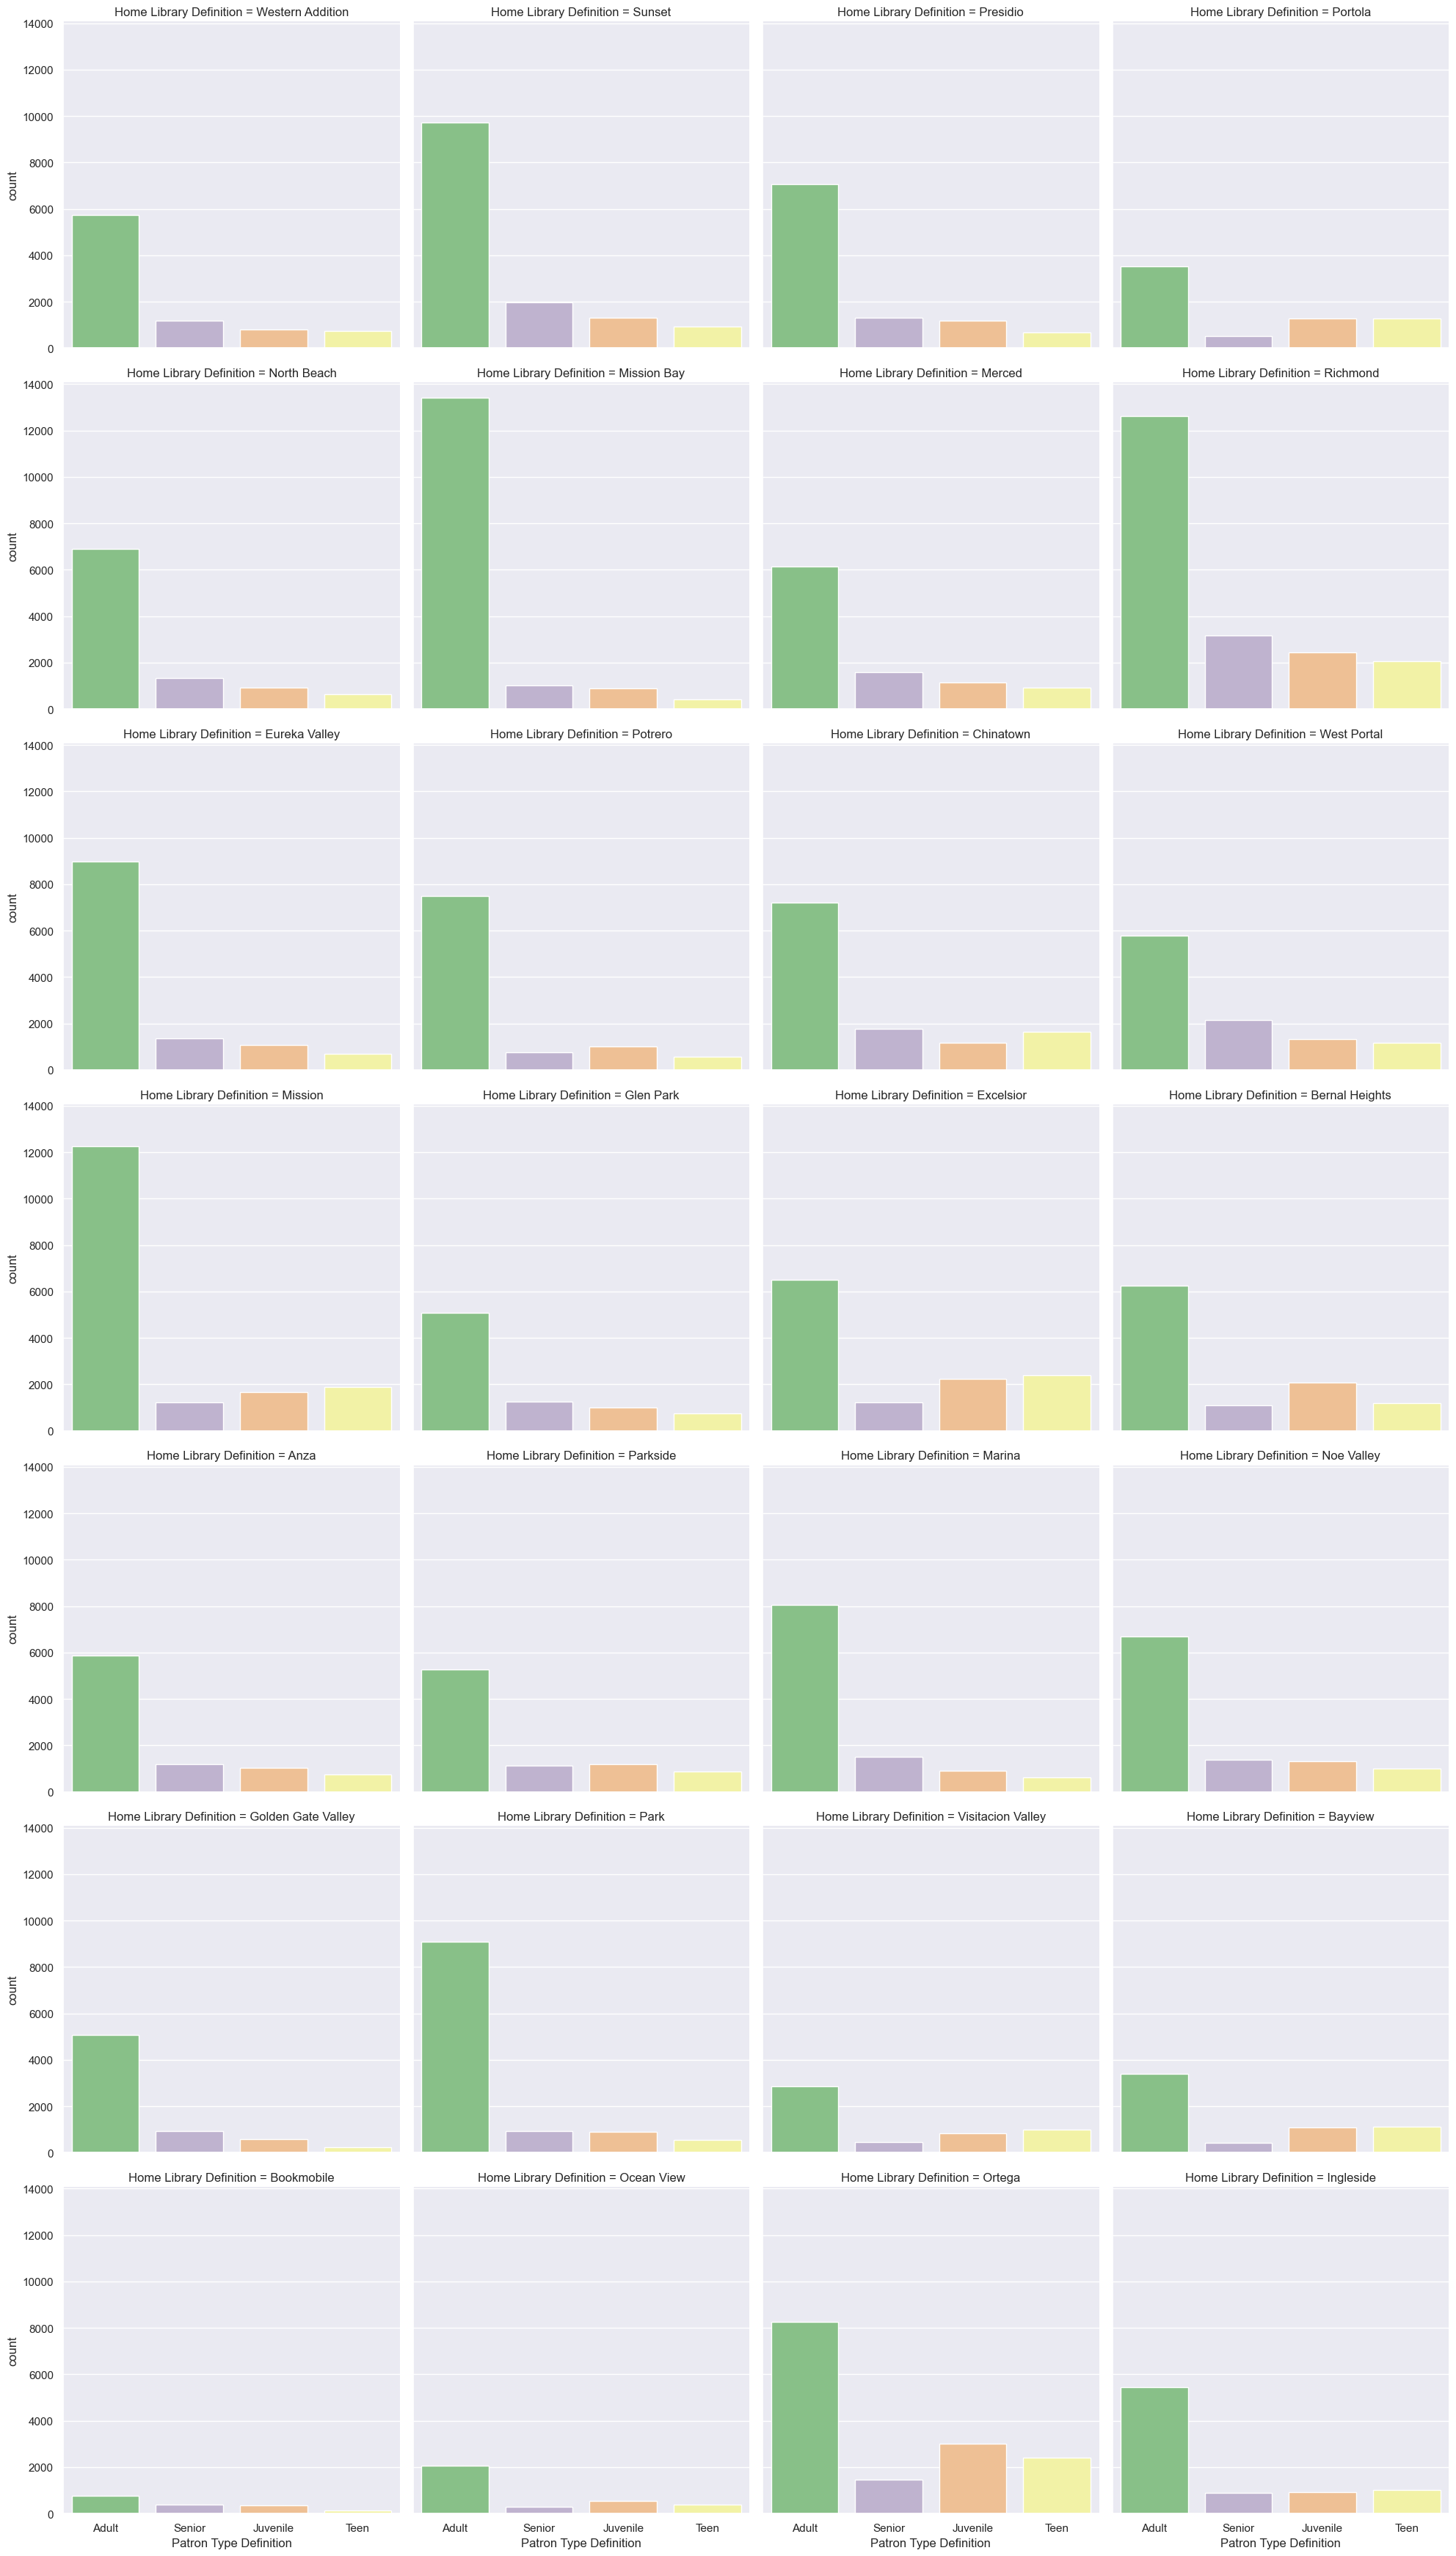

In [122]:
sns.catplot(x='Patron Type Definition', data=df_user, kind='count', col='Home Library Definition', 
            palette=sns.color_palette('Accent', 11), legend=False, errorbar=None, col_wrap=4)
plt.show()

In [31]:
df["Age Range"].value_counts(normalize=True)

Age Range
25 to 34 years       0.218430
35 to 44 years       0.199976
10 to 19 years       0.141366
45 to 54 years       0.116827
65 to 74 years       0.075642
20 to 24 years       0.059437
0 to 9 years         0.050603
75 years and over    0.048758
55 to 59 years       0.046194
60 to 64 years       0.041995
keine Angaben        0.000771
Name: proportion, dtype: float64

In [135]:
df["Notice Preference Definition"].value_counts(normalize=True)

Notice Preference Definition
Email            0.910278
Phone            0.070526
Print            0.012975
keine Angaben    0.006221
Name: proportion, dtype: float64

In [7]:
df_mail = df.loc[df['Notice Preference Definition'] == "Email"]
df_post = df.loc[df['Notice Preference Definition'] == "Print"]

In [92]:
df_post["Age Range"].mode()

0    25 to 34 years
Name: Age Range, dtype: object

In [67]:
(920*30+904*40+578*70+554*5+553*50+527*15+506*80+270*62+251*57+238*22)/5301

41.371062063761556

In [94]:
df_mail["Age Range"].mode()

0    25 to 34 years
Name: Age Range, dtype: object

In [75]:
(85538*30+78215*40+47791*15+45069*50+26859*70+21963*22+18719*5+17408*57+15891*80+15376*62)/(373104-275)

38.459492153239154

In [35]:
pd.crosstab(df['Notice Preference Definition'], df['Age Range'], margins=True, normalize=0)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,keine Angaben
Notice Preference Definition,,,,,,,,,,,
Email,0.050171,0.128090,0.058866,0.229260,0.209633,0.120795,0.046657,0.041211,0.071988,0.042591,0.000737
Phone,0.041443,0.320857,0.070156,0.084858,0.079323,0.068945,0.041166,0.050818,0.119521,0.122289,0.000623
Print,0.104175,0.099097,0.044754,0.172997,0.169989,0.103986,0.047198,0.050771,0.108687,0.095149,0.003197
keine Angaben,0.105882,0.137255,0.052157,0.242745,0.217255,0.105882,0.033333,0.038431,0.043922,0.020784,0.002353
All,0.050603,0.141366,0.059437,0.218430,0.199976,0.116827,0.046194,0.041995,0.075642,0.048758,0.000771


In [37]:
pd.crosstab(df['Notice Preference Definition'], df['Age Range'], margins=True, normalize=1)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,keine Angaben,All
Notice Preference Definition,,,,,,,,,,,,
Email,0.902512,0.824793,0.901527,0.955412,0.954237,0.941192,0.919404,0.893278,0.866308,0.795146,0.870253,0.910278
Phone,0.057760,0.160071,0.083244,0.027399,0.027975,0.041621,0.062850,0.085342,0.111437,0.176883,0.056962,0.070526
Print,0.026710,0.009095,0.009769,0.010276,0.011029,0.011549,0.013257,0.015686,0.018643,0.025319,0.053797,0.012975
keine Angaben,0.013018,0.006040,0.005459,0.006914,0.006759,0.005639,0.004489,0.005693,0.003612,0.002652,0.018987,0.006221


In [ ]:
# Altersgruppen

In [80]:
df["Patron Type Definition"].value_counts()

Patron Type Definition
Adult                  270406
Senior                  47203
Juvenile                42279
Teen                    34426
Welcome                  7916
Digital Access Card      3986
Teacher Card             2933
Retired Staff             211
Visitor                   181
At User Adult             124
Library By Mail           110
At User Senior             73
At User Teen                8
At User Welcome             8
Business                    7
At User Juvenile            5
Bibliocommons               3
Name: count, dtype: int64

In [131]:
filter1 = df['Patron Type Definition'].isin(["Adult", "Senior", "Juvenile", "Teen", "Business"])
filter2 = (df['Home Library Definition'] != "Main") & (df['Home Library Definition'] != "keine Angaben")
df_user = df.loc[filter1 & filter2]